<a href="https://colab.research.google.com/github/sverdoot/optimizer-SUG-torch/blob/master/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Optimization project/")
os.getcwd()

In [0]:
%matplotlib inline
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import time
import pandas as pd
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import pandas as pd

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device

device(type='cuda', index=0)

In [0]:
import sug
from sug import SUG

## Linear Regression

In [0]:
lrs = [0.1, 0.01, 0.001]
fc_sug = torch.load('./LINREG/lr_sug')
fc_adam = torch.load('./LINREG/lr_adam_0.01')
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./LINREG/lr_'+str(lr))

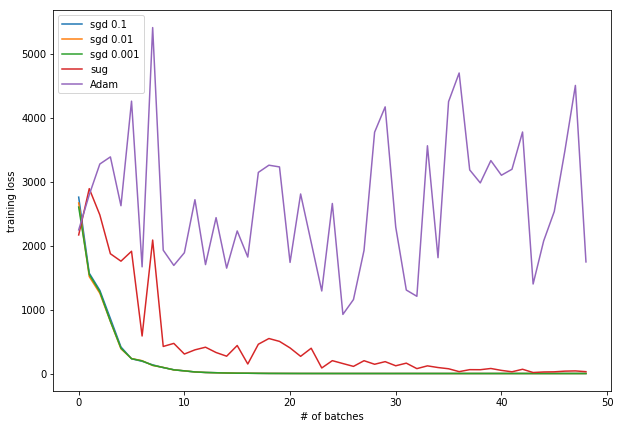

In [45]:
# plot train loss per 1 batches
smooth_over = 1
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss'][:50]
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
loss = fc_sug['tr_loss'][:50]    
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label="sug")
loss = fc_adam['tr_loss'][:50]    
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label="Adam")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

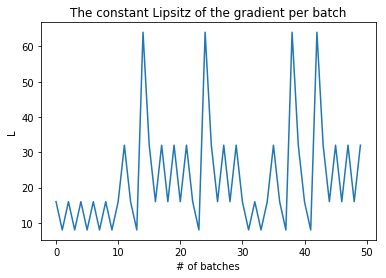

In [22]:
from matplotlib import pyplot as plt

plt.plot(fc_sug['lips'][:50])
plt.title("The constant Lipsitz of the gradient per batch")
plt.xlabel("# of batches")
plt.ylabel("L")
plt.show()

## MNIST : LR

In [0]:
lrs = [0.05, 0.01, 0.005]

In [0]:
#fc_sug = torch.load('./MNIST/LR_sug')
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./MNIST/LR_'+str(lr))

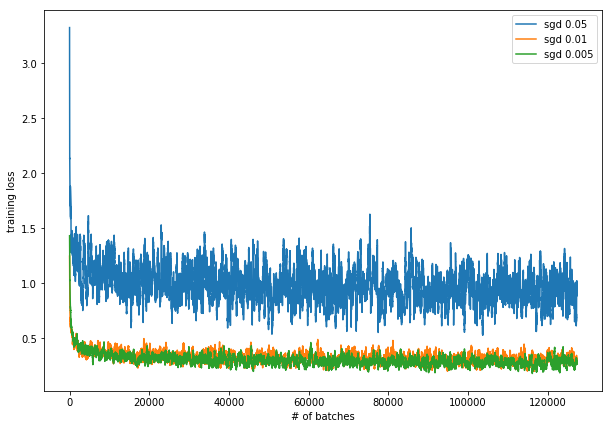

In [9]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
#plt.plot([np.mean(fc_sug['tr_loss'][i:i+smooth_over]) for i in range(len(fc_sug['tr_loss'])-smooth_over)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

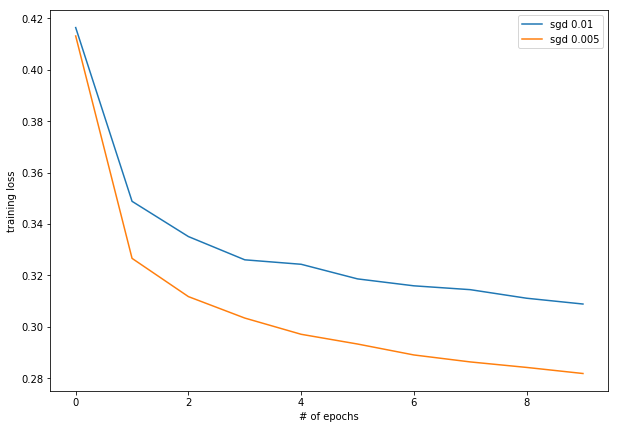

In [27]:
#plot train loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs[1:]:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['tr_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
#n_epochs = fc_sug['epoch']
#batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
#plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs")
plt.ylabel("training loss")
plt.legend()
plt.show()

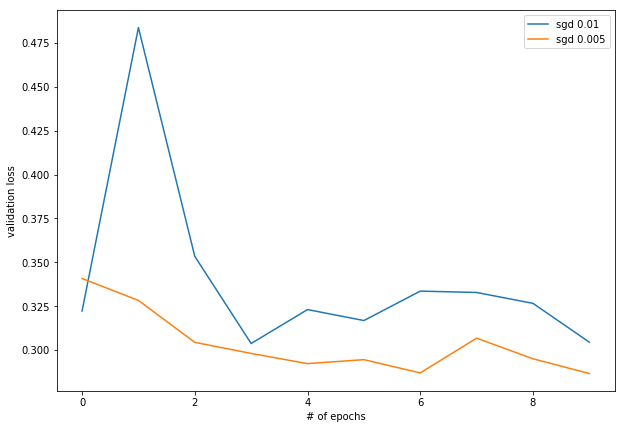

In [28]:
#plot validation loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs[1:]:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['val_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['val_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
#n_epochs = fc_sug['epoch']
#batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
#plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()

## MNIST : FC

In [0]:
fc_sug = torch.load('./MNIST/FCsug')
fc_adam = torch.load('./MNIST/FCadam')
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./MNIST/FC'+str(lr))

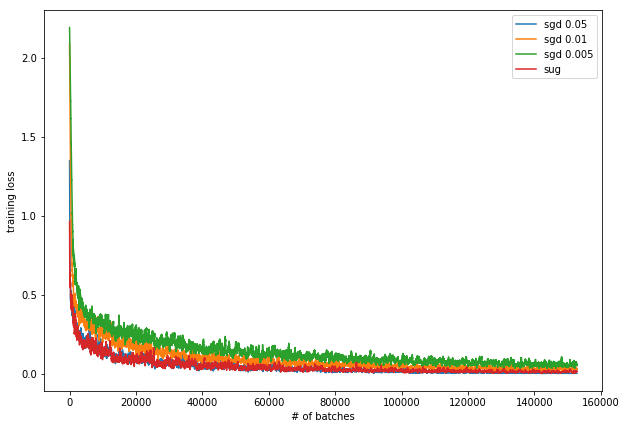

In [13]:
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+200]) for i in range(len(loss)-200)], label='sgd '+str(lr))
plt.plot([np.mean(fc_sug['tr_loss'][i:i+200]) for i in range(len(fc_sug['tr_loss'])-200)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

In [0]:
n_epochs = fc_sug['epoch']

In [15]:
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
batch_per_ep

12750

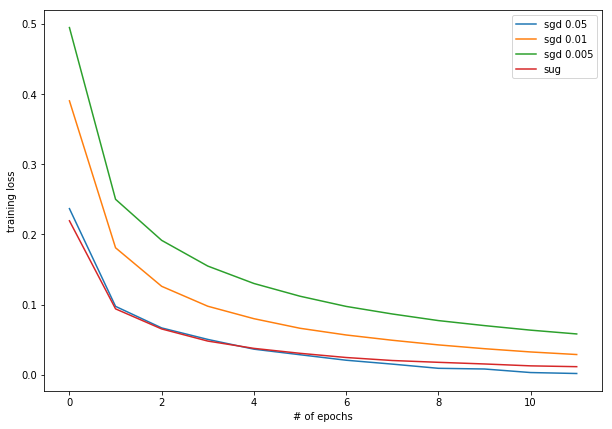

In [16]:
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug")
plt.xlabel("# of epochs")
plt.ylabel("training loss")
plt.legend()
plt.show()

In [17]:
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
batch_per_ep

2250

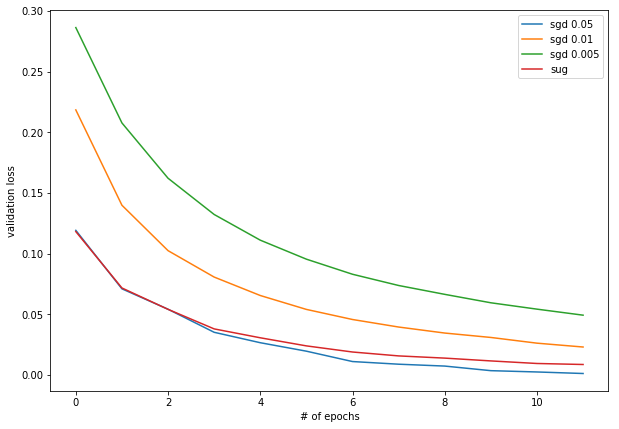

In [18]:
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['val_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
plt.plot([sum(fc_sug['val_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug")
plt.xlabel("# of epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()

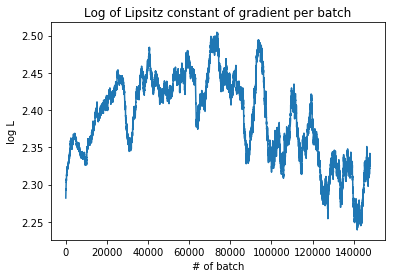

In [19]:
lips = fc_sug['lips']
smooth_over = 5000
smooth_lips = [np.mean(lips[i:i+smooth_over]) for i in range(len(lips)-smooth_over)]

plt.plot(np.log(smooth_lips))
plt.title("Log of Lipsitz constant of gradient per batch")
plt.xlabel("# of batch")
plt.ylabel("log L")
#plt.legend()
plt.show()

## MNIST : CNN

In [0]:
#fc_sug = torch.load('./MNIST/CNNsug20')
lrs = [0.01, 0.005]
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./MNIST/CNN'+str(lr))

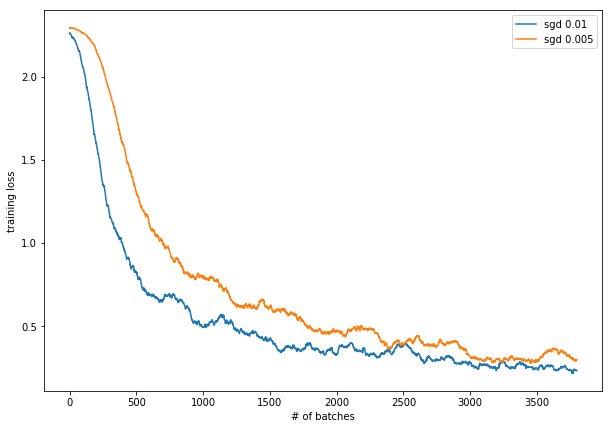

In [8]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss'][:4000]
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
#plt.plot([np.mean(fc_sug['tr_loss'][i:i+smooth_over]) for i in range(len(fc_sug['tr_loss'])-smooth_over)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

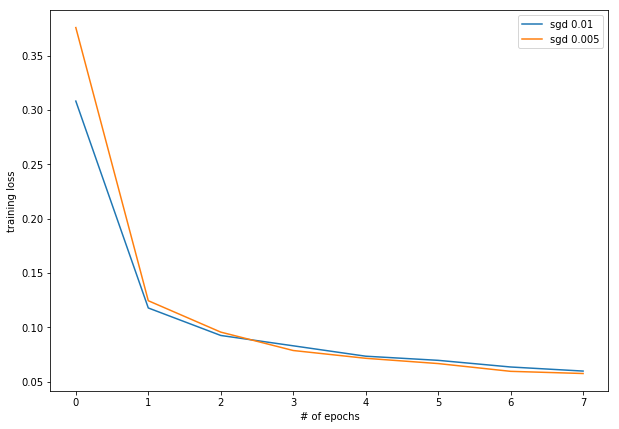

In [9]:
#plot train loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['tr_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
#n_epochs = fc_sug['epoch']
#batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
#plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs")
plt.ylabel("training loss")
plt.legend()
plt.show()

## CIFAR10 : CNN


In [0]:
fc_sug = torch.load('./CIFAR10/CNNsug20')
lrs = [0.01, 0.005]
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./CIFAR10/CNN_'+str(lr)+'_30')

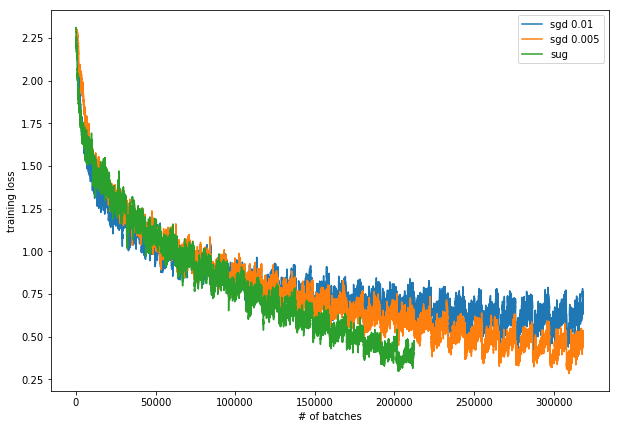

In [21]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
plt.plot([np.mean(fc_sug['tr_loss'][i:i+smooth_over]) for i in range(len(fc_sug['tr_loss'])-smooth_over)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

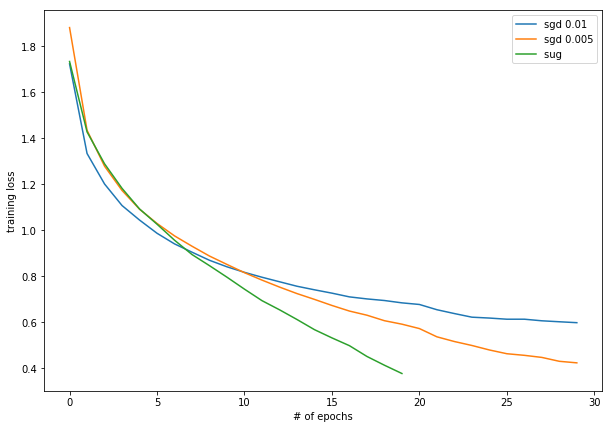

In [22]:
#plot train loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['tr_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs")
plt.ylabel("training loss")
plt.legend()
plt.show()

SGD, lr = 0.01. Time utill overfitting: 2m 8s
SGD, lr = 0.005. Time utill overfitting: 2m 49s
SUG, lr = 0.005. Time utill overfitting: 5m 2s


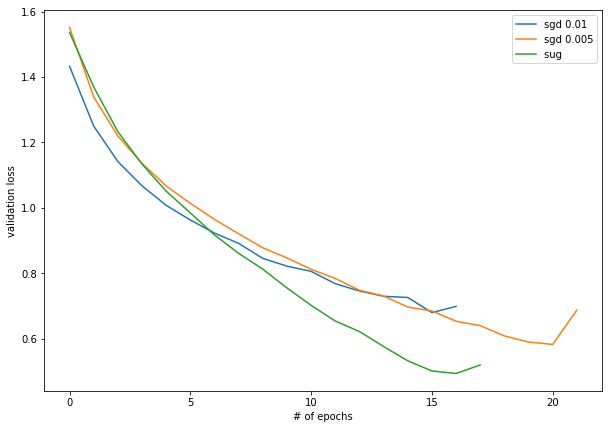

In [41]:
#plot val loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['val_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['val_loss']
    loss_per_ep = [sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)]
    for i, l in enumerate(loss_per_ep[:-2]):
       if l < loss_per_ep[i+1]:
          break      
    plt.plot(loss_per_ep[:i+2], label='sgd '+str(lr))
    print("SGD, lr = {}. Time utill overfitting: {}".format(lr, fc_sgd[lr]['times'][(i+1) * batch_per_ep]))
n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['val_loss']
loss_per_ep = [sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)]
for i, l in enumerate(loss_per_ep[:-2]):
    if l < loss_per_ep[i+1]:
        break      
plt.plot(loss_per_ep[:i+2], label='sug ')
print("SUG, lr = {}. Time utill overfitting: {}".format(lr, fc_sug['times'][(i+1) * batch_per_ep]))

plt.xlabel("# of epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()

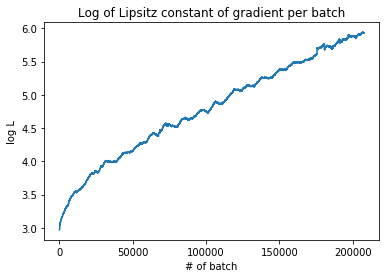

In [24]:
lips = fc_sug['lips']
smooth_over = 5000
smooth_lips = [np.mean(lips[i:i+smooth_over]) for i in range(len(lips)-smooth_over)]

plt.plot(np.log(smooth_lips))
plt.title("Log of Lipsitz constant of gradient per batch")
plt.xlabel("# of batch")
plt.ylabel("log L")
plt.show()

## IMDb : BiLSTM

In [0]:
fc_sug = torch.load('./IMDB/LSTM_sug')
lrs = [0.01, 0.05]
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./IMDB/LSTM_'+str(lr))

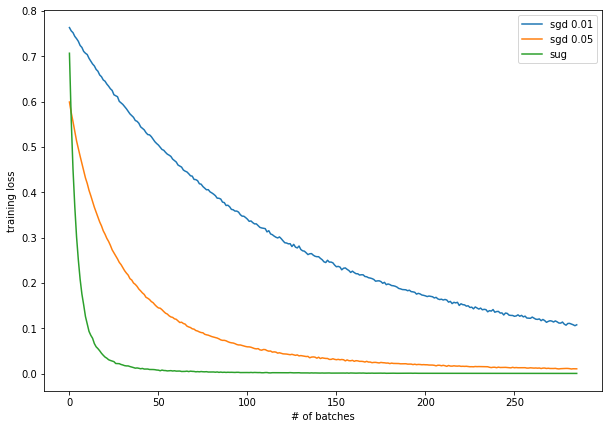

In [7]:
# plot train loss per 1 batches
smooth_over = 1
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
plt.plot([np.mean(fc_sug['tr_loss'][i:i+smooth_over]) for i in range(len(fc_sug['tr_loss'])-smooth_over)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

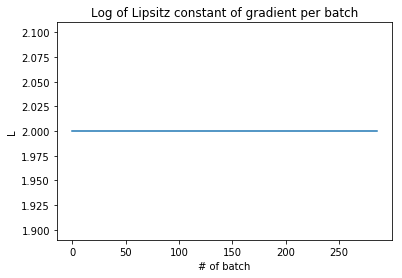

In [9]:
lips = fc_sug['lips']
smooth_over = 1
smooth_lips = [np.mean(lips[i:i+smooth_over]) for i in range(len(lips)-smooth_over)]

plt.plot(smooth_lips)
plt.title("Log of Lipsitz constant of gradient per batch")
plt.xlabel("# of batch")
plt.ylabel("L")
plt.show()